In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Functions

In [3]:
Empty, On, Off = 0, 1, -1
# neighbourhood = ((-1,0),(0,-1), (0, 1),(1,0))


In [6]:
def growth(m_list, p):
    """Growth cluster in lattice"""
    states = []
    boundary = [0,0,0,0]
    for i in range(len(m_list)):
        if m_list[i] == Empty:
            state = np.random.choice([On,Off], p=(p,1-p))
            states.append(state)
            if state == On:
                boundary[i] = 1
        elif m_list[i] == On:
            states.append(On)
        else:
            states.append(Off)
    
    return states,boundary

## Simulation

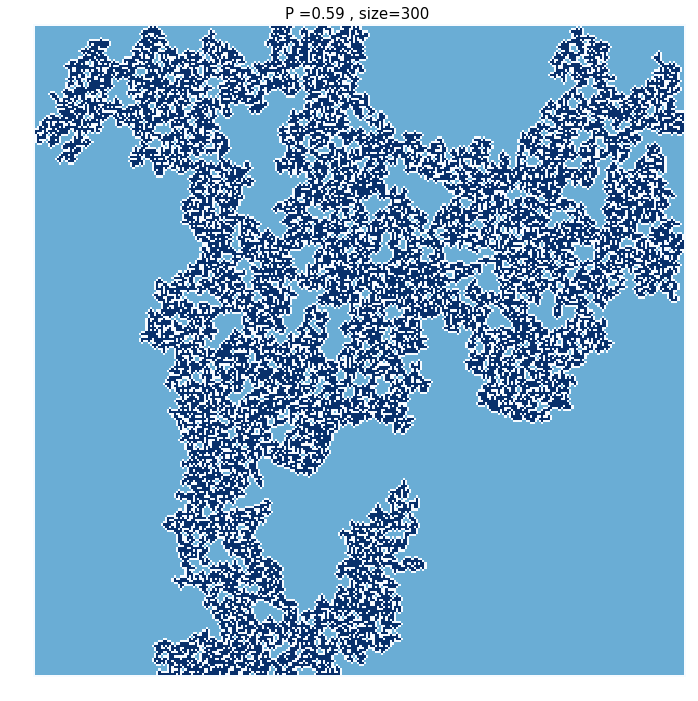

In [8]:
## creat Initial lattice with boundary condition
lattice_size = 300
lattice = np.zeros((lattice_size, lattice_size))
p = 0.59
right = np.ones((lattice_size,1)) * Off
left = np.ones((lattice_size,1)) * Off
up = np.ones((1,lattice_size+2)) * Off
down = np.ones((1,lattice_size+2)) * Off

lattice = np.concatenate((right,lattice,left),axis = 1)
lattice = np.concatenate((up,lattice,down),axis = 0)

## put seed in middle of lattice
lattice[int(lattice_size/2),int(lattice_size/2)] = On
bx, by = [int(lattice_size/2)], [int(lattice_size/2)]

## Start Simulation and grow cluster
while len(bx)!=0 : 
    states,boundary = growth([lattice[bx[0],by[0]-1], lattice[bx[0],by[0]+1], lattice[bx[0]+1,by[0]],lattice[bx[0]-1,by[0]]], p)
    lattice[bx[0],by[0]-1] = states[0]
    lattice[bx[0],by[0]+1] = states[1]
    lattice[bx[0]+1,by[0]] = states[2]
    lattice[bx[0]-1,by[0]] = states[3]

    if boundary[0] == On:
        bx.append(bx[0])
        by.append(by[0]-1)


    if boundary[1] == On:
        bx.append(bx[0])
        by.append(by[0]+1)


    if boundary[2] == On:
        bx.append(bx[0]+1)
        by.append(by[0])

    if boundary[3] == On:
        bx.append(bx[0]-1)
        by.append(by[0])


    bx.remove(bx[0])
    by.remove(by[0])
    
fig = plt.figure(figsize=(12,12))
plt.title('P =%.2f , size=%i '%(p,lattice_size) , fontsize = 15)
plt.axis('off')
plt.imshow(lattice,cmap=plt.cm.Blues)
#plt.savefig('Cluster fig1')

## Generate Data

In [10]:
probability = [0.50,0.55,0.59]
S = [[],[],[]]
Xi = [[],[],[]]
lattice_size = 500
for n,p in enumerate(probability):
    for m in range(200):
        points = []
        if m%10 ==0:
            print(m)
            
        ## creat Initial lattice with boundary condition
        
        lattice = np.zeros((lattice_size, lattice_size))

        right = np.ones((lattice_size,1)) * Off
        left = np.ones((lattice_size,1)) * Off
        up = np.ones((1,lattice_size+2)) * Off
        down = np.ones((1,lattice_size+2)) * Off

        lattice = np.concatenate((right,lattice,left),axis = 1)
        lattice = np.concatenate((up,lattice,down),axis = 0)
        
        ## put seed in middle of lattice
        lattice[int(lattice_size/2),int(lattice_size/2)] = On
        bx, by = [int(lattice_size/2)], [int(lattice_size/2)]


        while len(bx)!=0 : 
            states,boundary = growth([lattice[bx[0],by[0]-1], lattice[bx[0],by[0]+1], lattice[bx[0]+1,by[0]],lattice[bx[0]-1,by[0]]], p)
            lattice[bx[0],by[0]-1] = states[0]
            lattice[bx[0],by[0]+1] = states[1]
            lattice[bx[0]+1,by[0]] = states[2]
            lattice[bx[0]-1,by[0]] = states[3]

            if boundary[0] == On:
                bx.append(bx[0])
                by.append(by[0]-1)


            if boundary[1] == On:
                bx.append(bx[0])
                by.append(by[0]+1)


            if boundary[2] == On:
                bx.append(bx[0]+1)
                by.append(by[0])

            if boundary[3] == On:
                bx.append(bx[0]-1)
                by.append(by[0])


            bx.remove(bx[0])
            by.remove(by[0])

    ## Saving Data
        for i in range(len(lattice)):
            for j in range(len(lattice)):
                if lattice[i,j] == On :
                    points.append([i,j])

        CM = np.mean(points, axis=0)
        xi = 0
        for k in range(len(points)):
            xi += np.square(np.linalg.norm(points[k] - CM)) 
        if xi != 0:
            Xi[n].append(np.sqrt(xi / len(points)))
            S[n].append(len(points))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


## Fit Line

In [11]:
coef1 = np.polyfit(np.log(Xi[0]),np.log(S[0]),1)
coef2 = np.polyfit(np.log(Xi[1]),np.log(S[1]),1)
coef3 = np.polyfit(np.log(Xi[2]),np.log(S[2]),1)

In [12]:
Xi_s = [np.mean(Xi[0]),np.mean(Xi[1]),np.mean(Xi[2])]

S_s = [np.mean(S[0]),np.mean(S[1]),np.mean(S[2])]

In [13]:
coef4 = np.polyfit(np.log(Xi_s),np.log(S_s),1)

## Visualisation Data

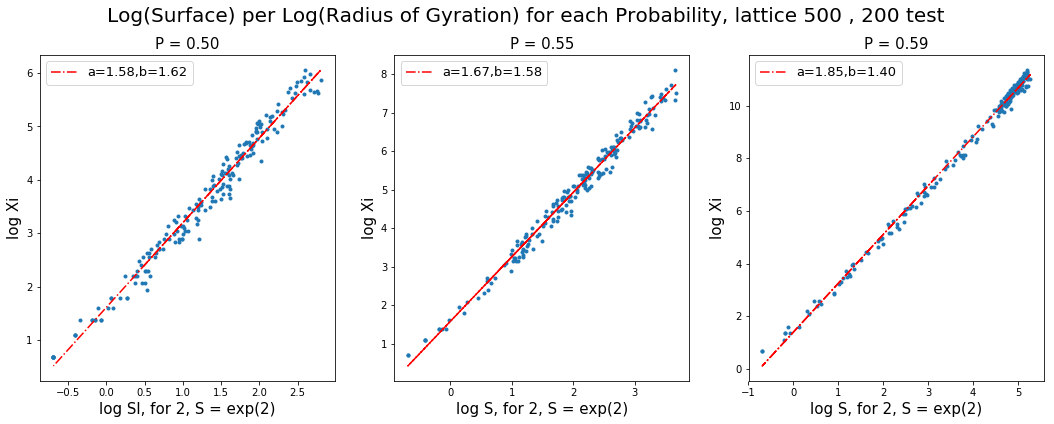

In [18]:
fig, axes = plt.subplots(1,3,figsize=(18,6))
fig.suptitle('Log(Surface) per Log(Radius of Gyration) for each Probability, lattice 500 , 200 test',y=0.99 ,fontsize = 20)

axes[0].set_title('P = 0.50',fontsize = 15)
axes[0].scatter(np.log(Xi[0]),np.log(S[0]), marker='.')
axes[0].plot(np.log(Xi[0]), np.polyval(coef1,np.log(Xi[0])), 'r-.', label='a=%.2f,b=%.2f'%(coef1[0],coef1[1]))
axes[0].set_xlabel('log Sl, for 2, S = exp(2)',fontsize = 15)
axes[0].set_ylabel('log Xi',fontsize = 15)
axes[0].legend(loc='best',fontsize = 13)

axes[1].set_title('P = 0.55',fontsize = 15)
axes[1].scatter(np.log(Xi[1]),np.log(S[1]), marker='.')
axes[1].plot(np.log(Xi[1]), np.polyval(coef2,np.log(Xi[1])), 'r-.', label='a=%.2f,b=%.2f'%(coef2[0],coef2[1]))
axes[1].set_xlabel('log S, for 2, S = exp(2)',fontsize = 15)
axes[1].set_ylabel('log Xi',fontsize = 15)
axes[1].legend(loc='best',fontsize = 13)

axes[2].set_title('P = 0.59',fontsize = 15)
axes[2].scatter(np.log(Xi[2]),np.log(S[2]), marker='.')
axes[2].plot(np.log(Xi[2]), np.polyval(coef3,np.log(Xi[2])), 'r-.', label='a=%.2f,b=%.2f'%(coef3[0],coef3[1]))
axes[2].set_xlabel('log S, for 2, S = exp(2)',fontsize = 15)
axes[2].set_ylabel('log Xi',fontsize = 15)
axes[2].legend(loc='best',fontsize = 13)

plt.savefig('Cluster fig2')

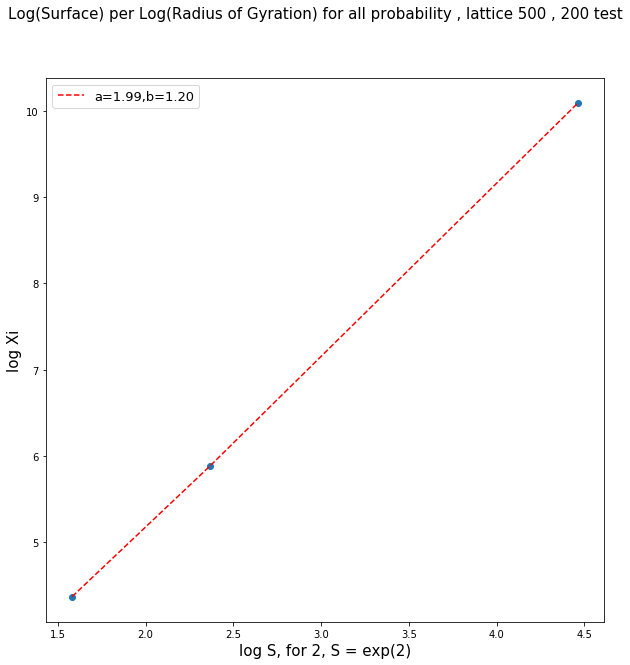

In [21]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Log(Surface) per Log(Radius of Gyration) for all probability , lattice 500 , 200 test' ,fontsize = 15)

plt.scatter(np.log(Xi_s),np.log(S_s),marker='o')
plt.plot(np.log(Xi_s),np.log(S_s), 'r--', label='a=%.2f,b=%.2f'%(coef4[0],coef4[1]))
plt.xlabel('log S, for 2, S = exp(2)',fontsize = 15)
plt.ylabel('log Xi',fontsize = 15)
plt.legend(loc='best',fontsize = 13)

plt.savefig('Cluster fig3')